In [1]:
!pip install sounddevice

In [2]:
import sounddevice as sd

In [3]:
from scipy.io.wavfile import write

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os

In [6]:
duration = 1
sample_freq = 22050

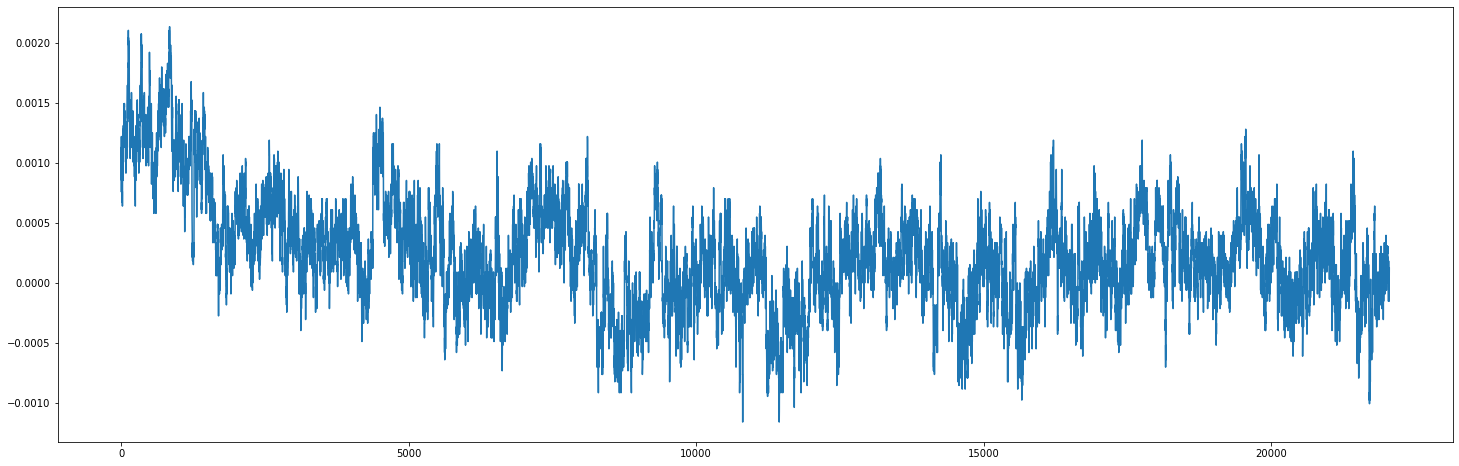

In [7]:
recording = sd.rec(int(duration*sample_freq),sample_freq,channels=1)
sd.wait()
plt.figure(figsize=(25,8))
plt.plot(recording)

In [8]:
recording

array([[ 7.6293945e-04],
       [ 1.1291504e-03],
       [ 1.0375977e-03],
       ...,
       [-6.1035156e-05],
       [ 3.0517578e-05],
       [ 1.2207031e-04]], dtype=float32)

In [9]:
recording.shape

(22050, 1)

In [10]:
write('hi.wav',sample_freq,recording)

In [11]:
import IPython.display as ipd

In [12]:
ipd.Audio('hi.wav')

In [13]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=e0a3dbb6b7ea7c742f57c96cf098f14c2a75efbe687d89354826ac6d7cdc66ba
  Stored in directory: c:\users\rakshit\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=17d01f3caf5dbc385e7449ced0001349b7e0404d73258935070183e89baaa045
  Stored in directory: c:\users\rakshit\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [14]:
import librosa as alib

In [15]:
sig, rate = alib.load('hi.wav')

In [16]:
rate


22050

In [17]:
sig

array([ 7.6293945e-04,  1.1291504e-03,  1.0375977e-03, ...,
       -6.1035156e-05,  3.0517578e-05,  1.2207031e-04], dtype=float32)

In [18]:
22050/512

43.06640625

In [19]:
feats = alib.feature.mfcc(sig,n_mfcc=10)
feats

array([[-6.41105957e+02, -6.36833130e+02, -6.37604065e+02,
        -6.40434753e+02, -6.47751953e+02, -6.41303528e+02,
        -6.36659668e+02, -6.43828369e+02, -6.39849731e+02,
        -6.33008118e+02, -6.25348511e+02, -6.25397339e+02,
        -6.27353149e+02, -6.26003967e+02, -6.34454285e+02,
        -6.37152039e+02, -6.33659790e+02, -6.32648804e+02,
        -6.33867249e+02, -6.28700928e+02, -6.28792175e+02,
        -6.26796692e+02, -6.27081726e+02, -6.27415405e+02,
        -6.29978027e+02, -6.36208618e+02, -6.46331970e+02,
        -6.38155151e+02, -6.25324402e+02, -6.24458740e+02,
        -6.26442688e+02, -6.24558716e+02, -6.25140686e+02,
        -6.25540833e+02, -6.30369507e+02, -6.37768677e+02,
        -6.38027466e+02, -6.46937195e+02, -6.40825867e+02,
        -6.32852173e+02, -6.33293579e+02, -6.30367737e+02,
        -6.25682312e+02, -6.34365662e+02],
       [ 8.25938034e+01,  8.42131729e+01,  8.87479782e+01,
         8.89961090e+01,  8.27486572e+01,  8.27556152e+01,
         8.46

In [20]:
feats.shape

(10, 44)

In [21]:
feats.mean(axis=1).shape

(10,)

In [22]:
import pandas as pd

In [23]:
def extract_features(sig=None,rate=None, path=None):
    if path:
        sig,rate = alib.load(path)
    mfcc = alib.feature.mfcc(sig,rate,n_mfcc=30)
    stft = alib.feature.chroma_stft(sig,rate,n_chroma=12)
    zcr = alib.feature.zero_crossing_rate(sig,rate)
    mfcc_mean = mfcc.mean(axis=1).tolist()
    mfcc_var = mfcc.var(axis=1).tolist()
    stft_mean = [stft.mean()]
    stft_var = [stft.var()]
    zcr_mean = [zcr.mean()]
    zcr_var = [zcr.var()]   
    return mfcc_mean + mfcc_var + stft_mean + stft_var + zcr_mean + zcr_var

In [24]:
features = extract_features(path = 'hi.wav')


In [25]:
df = pd.DataFrame({i:[] for i in range(65)})

In [26]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
